The following cells are used to check all the requirements are satisfied. As explained in the readme file you'll need:
+ Tensorflow 2.17.0
+ Keras 3.4.1
+ Numpy 1.26.4
+ Pandas 2.2.2
+ Matplotlib 3.9.1

You can check manually if the versions installed are correct. Otherwise, the following code will automatically check if you've install the correct versions of the needed libraries and if not, it'll download them using your preferred package manager.

In [1]:
import subprocess
import sys
import importlib

# Define the packages and versions needed
required_packages = {
    "tensorflow": "2.17.0",
    "keras": "3.4.1",
    "numpy": "1.26.4",
    "pandas": "2.2.2",
    "matplotlib": "3.9.1"
}

def install_package(package, version, package_manager):
    if package_manager.lower()=="pip":
        print(f"Using pip to install missing libraries")
        install_pip_package(package, version)
        return None
    if package_manager.lower()=="conda":
        print(f"Using conda to install missing libraries")
        install_conda_package(package, version)
        return None
    else:
        print(f"Please specify either conda or pip as your package manager")
        return None
    
def install_pip_package(package, version):
    """Install or upgrade a package to a specific version using pip."""
    subprocess.check_call([sys.executable, "-m", "pip", "install", f"{package}=={version}"])

def install_conda_package(package, version):
    """Install or upgrade a package to a specific version using conda."""
    subprocess.check_call(["conda", "install", "--yes", f"{package}={version}"])

def check_package_version(package, version, package_manager):
    """Check if a package is installed with the correct version."""
    try:
        pkg = importlib.import_module(package)
        installed_version = pkg.__version__
        if installed_version != version:
            print(f"{package} version {installed_version} installed, but {version} is required. Upgrading...")
            install_package(package, version, package_manager)
        else:
            print(f"{package} {version} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing version {version}...")
        install_package(package, version, package_manager)

def main():
    """Check and install necessary package versions."""
    package_manager=input(f"Please input your preferred package manager: Conda or Pip\n")
    
    for package, version in required_packages.items():
        check_package_version(package, version, package_manager)

    print("All required packages are installed with the correct versions.")

if __name__ == "__main__":
    main()

2.17.0, 2.17.0
tensorflow 2.17.0 is already installed.
3.4.1, 3.4.1
keras 3.4.1 is already installed.
1.26.4, 1.26.4
numpy 1.26.4 is already installed.
2.2.2, 2.2.2
pandas 2.2.2 is already installed.
3.9.1, 3.9.1
matplotlib 3.9.1 is already installed.
All required packages are installed with the correct versions.


The following will show the architecture of the model, please run this cell so that the architecture is saved.

In [19]:

import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt

def get_train_val(train_directory,val_directory):
    train = keras.utils.image_dataset_from_directory(train_directory, labels="inferred", label_mode="categorical", batch_size=128, image_size=(224, 224))
    val =  keras.utils.image_dataset_from_directory(val_directory, labels="inferred", label_mode="categorical", batch_size=128, image_size=(224, 224))
    return train, val
def create_model():
    model = keras.models.Sequential([
        keras.layers.Input(shape=(224, 224, 3)),
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),

        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),

        keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),
        keras.layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation='relu', kernel_regularizer=keras.regularizers.L2(1e-4)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-4,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


The following code was used to train the model on the input data, please use this if you want to train the model aswell and tune hyperparameters.
Otherwise, please skip past this cell and the next as the model weights will be loaded next. 

In [20]:
train_set, val_set=get_train_val("/local/data/tiny-tiny-imagenet/train","/local/data/tiny-tiny-imagenet/val")

model=create_model()

model_checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath='/uolstore/home/users/sc21lt/Documents/SummerInternship/tiny_imagenet_model.checkpoint.weights.h5',
    save_best_only=True,
    monitor='val_loss',
    save_weights_only=True,
    mode='min')
history=model.fit(train_set, validation_data=val_set,callbacks=[model_checkpoint_callback], epochs=1000)

model.summary()



Found 2500 files belonging to 5 classes.
Found 250 files belonging to 5 classes.
Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 349ms/step - accuracy: 0.1857 - loss: 2.6695 - val_accuracy: 0.2040 - val_loss: 1.6451
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.1850 - loss: 2.5729 - val_accuracy: 0.1800 - val_loss: 1.6643
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.2260 - loss: 2.4462 - val_accuracy: 0.1800 - val_loss: 1.6865
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.2097 - loss: 2.5031 - val_accuracy: 0.1680 - val_loss: 1.6902
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.2241 - loss: 2.4392 - val_accuracy: 0.2200 - val_loss: 1.7048
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.2419 - loss: 2.3530 - val_accuracy: 0.2120 - val_loss: 1.7293
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.2346 - loss: 2.3288 - val_accuracy: 0.2080 - val_loss: 1.7658
Epoch 8/

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 265,936 (1.01 MB)

 Trainable params: 132,461 (517.43 KB)

 Non-trainable params: 1,012 (3.95 KB)

 Optimizer params: 132,463 (517.44 KB)

Unfortunately the accuracy and loss can only be plotted if the model is trained and the history saved, so skip this cell if you didn't train the model from scratch.

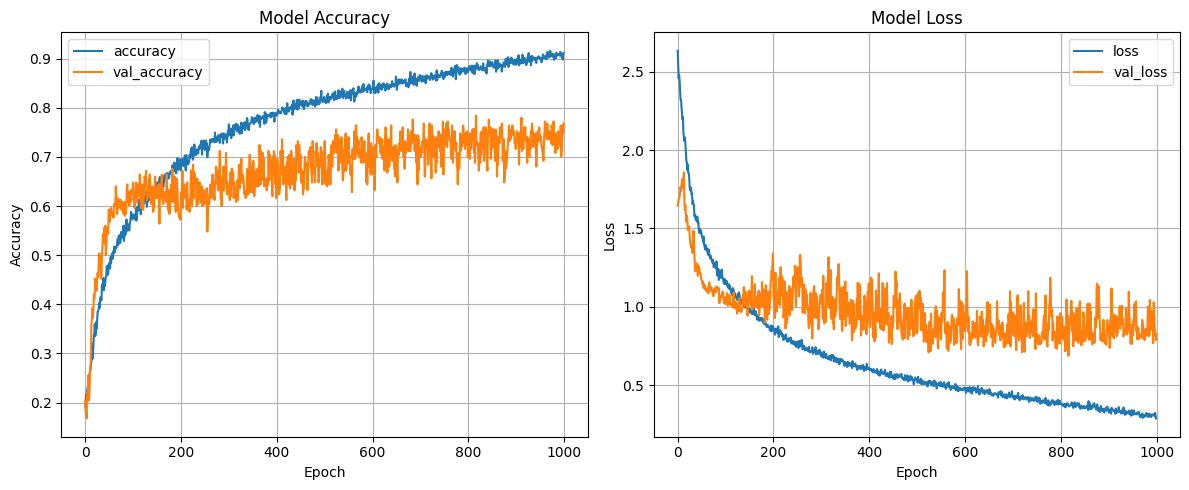

In [21]:
history_df = pd.DataFrame(history.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

history_df[['accuracy', 'val_accuracy']].plot(ax=ax1)
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

history_df[['loss', 'val_loss']].plot(ax=ax2)
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

## Important cell to load the model
If the model wasn't trained from scratch, please run the following cell to show the predictions.

In [13]:
model=create_model()
model.load_weights('/Path/To/The/Model/tiny_imagenet_model.checkpoint.weights.h5')

The following cell will show the predicted class and the confidence of the model made on any image used.

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

def get_prediction_label(model, img_path, class_names):
    img = keras.utils.load_img(img_path)
    img_array = keras.utils.img_to_array(img)
    img_array = tf.image.resize(img_array, (224, 224))
    img_array = tf.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    return predicted_class_name, confidence


img_path = 'Your/Image/Path'
class_names = train_set.class_names

predicted_label, confidence = get_prediction_label(model, img_path, class_names)
print(f"Predicted class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted class: goose
Confidence: 0.58


# Gradcam and Gradcam++ implementations
The following code uses first second and third derivatives to compute Grad-Cam and Grad-Cam++.

tf.Tensor([  1 224 224   3], shape=(4,), dtype=int32)
Predicted: tf.Tensor([[4.7913651e-05 1.6648065e-04 5.7738151e-05 9.9731582e-01 2.4119902e-03]], shape=(1, 5), dtype=float32)


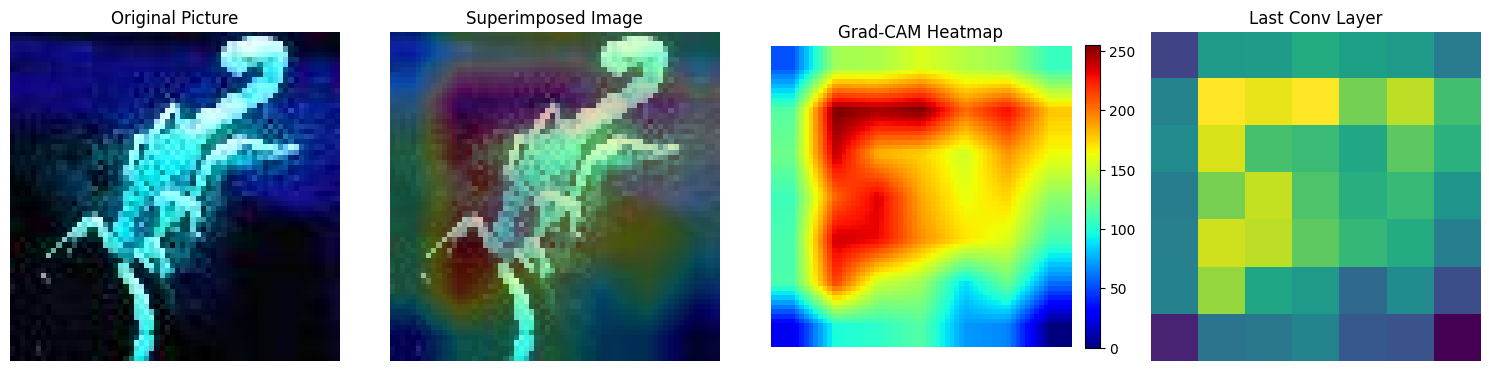

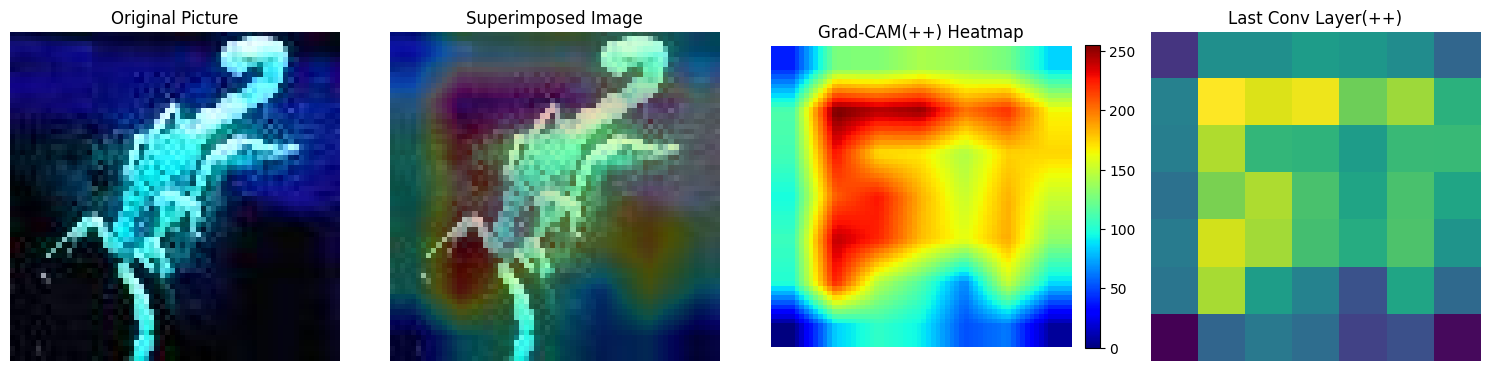

In [35]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

def preprocess_image(img_path, target_size=(224, 224)):
    img = tf.keras.utils.load_img(img_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.imagenet_utils.preprocess_input(img_array)
    return img_array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

    grad_model = keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.get_layer(index=-1).output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def grad_cam_plus(img_array, model, last_conv_layer_name, pred_index=None):


    grad_model = keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.get_layer(index=-1).output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = grad_model(img_array)
                if pred_index is None:
                    pred_index = np.argmax(predictions[0])
                output = predictions[:, pred_index]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

def display_gradcam(img_path, heatmap, alpha=0.3, plus_plus=False):
    
    original_img = keras.utils.load_img(img_path)
    img_array = keras.utils.img_to_array(original_img)
    original_heatmap=heatmap
    heatmap = tf.image.resize(heatmap[..., tf.newaxis], (img_array.shape[0], img_array.shape[1]))
    heatmap = np.squeeze(heatmap)

    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    heatmap = np.uint8(255 * heatmap)

    jet = mpl.colormaps["jet"]
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    superimposed_img = jet_heatmap * alpha + img_array / 255.0 * (1 - alpha)
    superimposed_img = np.clip(superimposed_img, 0, 1)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4))

    ax1.imshow(original_img)
    ax1.set_title("Original Picture")
    ax1.axis('off')

    ax2.imshow(superimposed_img)
    ax2.set_title("Superimposed Image")
    ax2.axis('off')
    if plus_plus:
        im3 = ax3.imshow(heatmap, cmap='jet')
        ax3.set_title("Grad-CAM(++) Heatmap")
        ax3.axis('off')
        plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

        ax4.imshow(original_heatmap)
        ax4.set_title("Last Conv Layer(++)")
        ax4.axis('off')
    else:
        im3 = ax3.imshow(heatmap, cmap='jet')
        ax3.set_title("Grad-CAM Heatmap")
        ax3.axis('off')
        plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

        ax4.imshow(original_heatmap)
        ax4.set_title("Last Conv Layer")
        ax4.axis('off')

    plt.tight_layout()
    plt.show()



img_path='Your/Image/Path'

img = keras.utils.load_img(img_path)
img_array = keras.utils.img_to_array(img)
img_array = tf.image.resize(img_array, (224, 224))
img_array = tf.expand_dims(img_array, axis=0)
print(tf.shape(img_array))

last_conv_layer_name='name of the last convolutional layer'

gradcam_heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
new_gradcamPP_heatmap = grad_cam_plus(img_array, model, last_conv_layer_name)

display_gradcam(img_path, gradcam_heatmap)
display_gradcam(img_path, new_gradcamPP_heatmap, plus_plus=True)


## Integrated gradients 
The following cell will show the output for the integrated gradients technique.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


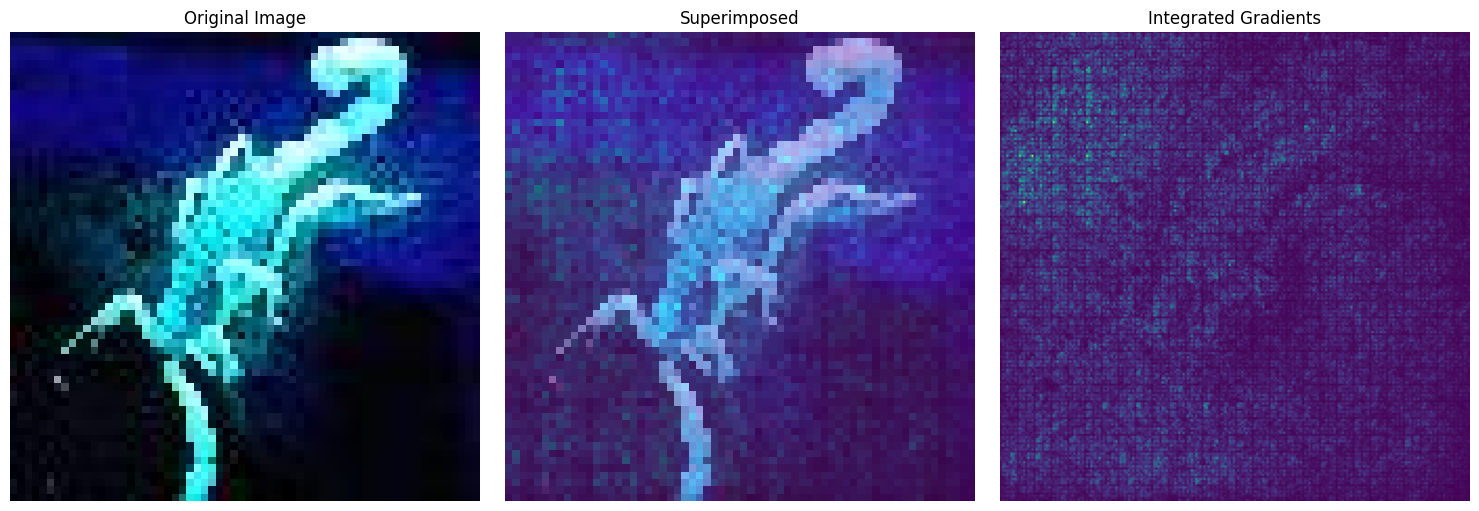

Predicted class: [[0. 0. 1. 0. 0.]]


In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img_path, target_size=(224, 224)):
    img = tf.keras.utils.load_img(img_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.imagenet_utils.preprocess_input(img_array)
    return img_array

def integrated_gradients(model, img, target_class_idx, steps=50, baseline=None):

    if baseline is None:
        baseline = tf.zeros_like(img)

    alphas = tf.linspace(0.0, 1.0, steps)
    alphas = tf.reshape(alphas, (steps, 1, 1, 1))

    interpolated_inputs = baseline + alphas * (img - baseline)

    with tf.GradientTape() as tape:
        tape.watch(interpolated_inputs)
        outputs = model(interpolated_inputs)
        target_outputs = outputs[:, target_class_idx]

    gradients = tape.gradient(target_outputs, interpolated_inputs)

    avg_gradients = tf.reduce_mean(gradients, axis=0)
    integrated_grads = (img - baseline) * avg_gradients

    return integrated_grads[0]

def visualize_attributions(img_path, attributions):
    original_img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(original_img)
    
    attr = tf.numpy_function(np.array, [attributions], tf.float32)
    attr = np.sum(np.abs(attr), axis=-1)
    attr = (attr - np.min(attr)) / (np.max(attr) - np.min(attr))
    
    attr_resized = tf.image.resize(tf.expand_dims(attr, axis=-1), tf.shape(img)[:2])
    attr_resized = tf.squeeze(attr_resized)

    colormap = plt.get_cmap('viridis')
    attr_colored = colormap(attr_resized.numpy())

    img_normalized = img / 255.0
    superimposed = img_normalized * 0.54 + attr_colored[:, :, :3] * 0.8

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(superimposed)
    plt.title('Superimposed')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(attr, cmap='viridis')
    plt.title('Integrated Gradients')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

img_path ='Your/Image/Path'
img =preprocess_image(img_path)

preds = model.predict(img)
top_pred_class = tf.argmax(preds[0])
top_pred_class_idx = int(top_pred_class)

attributions = integrated_gradients(model, img, top_pred_class_idx)
visualize_attributions(img_path, attributions)

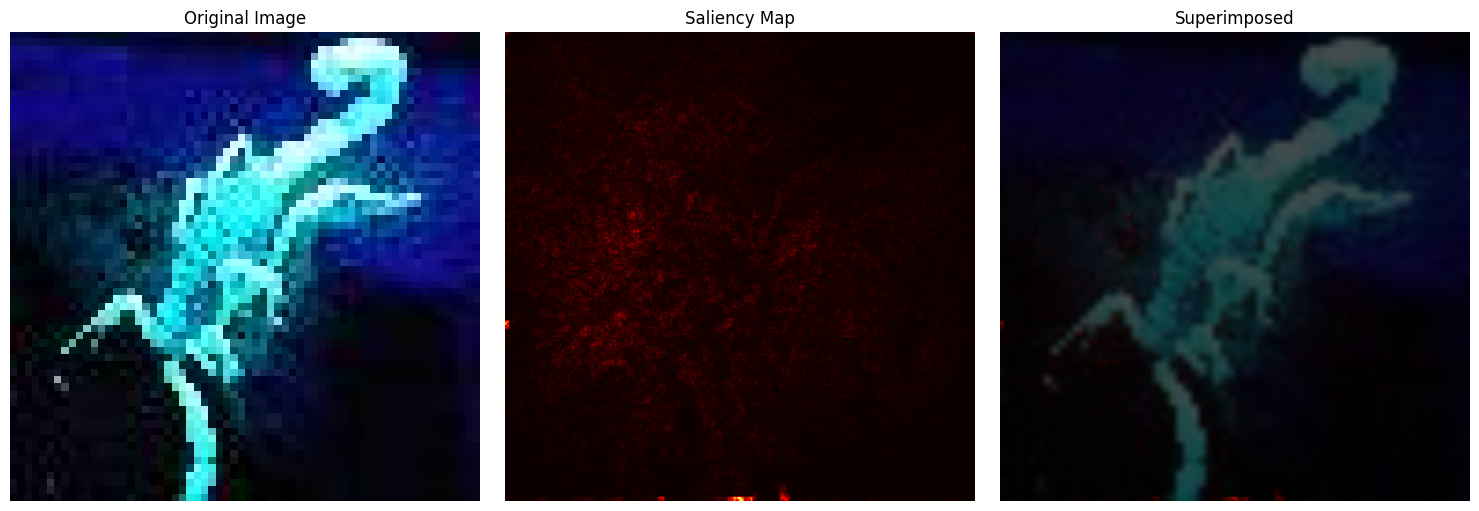

In [40]:
def compute_saliency_map(model, image, class_idx):
    with tf.GradientTape() as tape:
        tape.watch(image)
        
        predictions = model(image)
        
        class_score = predictions[:, class_idx]
    
    gradients = tape.gradient(class_score, image)
    
    saliency_map = tf.reduce_max(tf.abs(gradients), axis=-1)
    
    return saliency_map[0].numpy()

def visualize_saliency_map(image, saliency_map):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.imshow(image)
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())
    ax2.imshow(saliency_map, cmap='hot')
    ax2.set_title('Saliency Map')
    ax2.axis('off')
    
    img_array = keras.utils.img_to_array(image)
    img_array = tf.image.resize(img_array, (224, 224))
    img_array = img_array / 255.0  
    
    saliency_map_resized = tf.image.resize(saliency_map[..., np.newaxis], (224, 224))
    
    heatmap = np.zeros((224, 224, 3))
    heatmap[..., 0] = saliency_map_resized[..., 0]
    superimposed = img_array * 0.3 + heatmap * 0.7
    
    ax3.imshow(superimposed)
    ax3.set_title('Superimposed')
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()

img_path= 'Your/Image/Path'
original_img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(original_img)
img = tf.image.resize(img, (224, 224))
img = tf.expand_dims(img, axis=0)


pred_class = np.argmax(preds[0])

saliency_map = compute_saliency_map(model, img, pred_class)

visualize_saliency_map(original_img , saliency_map)